In [71]:
import numpy as np;
from sklearn.datasets import make_regression
#pour visualiser les données 
import matplotlib.pyplot as plt 


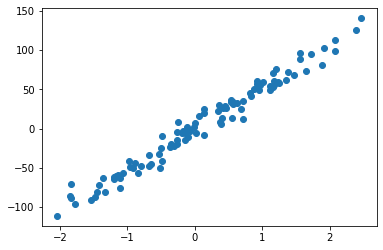

In [72]:
x,y = make_regression(n_samples = 100 , n_features = 1, noise = 10)
plt.scatter(x,y)

In [73]:
print(x.shape)
#make_regression , les dimentions des y sont incompletes -- donc [reshape] pour redimentionner
y = y.reshape(y.shape[0],1) #on prend le nombre de lignes dans y appelé shape[0]
print(y.shape)

(100, 1)
(100, 1)


In [74]:
#créer matrice X 
#hstake coller deux vecteurs numpy ensemble
#je colle mon vexteur X à côté d'un vecteur des 1 qui a le même nombre de lignes que X
X = np.hstack((x, np.ones(x.shape)))
X

array([[ 3.43676656e-01,  1.00000000e+00],
       [ 1.22689510e+00,  1.00000000e+00],
       [ 5.44335180e-01,  1.00000000e+00],
       [-2.44399502e-01,  1.00000000e+00],
       [ 8.15925010e-01,  1.00000000e+00],
       [-2.67716305e-01,  1.00000000e+00],
       [ 9.16653441e-01,  1.00000000e+00],
       [ 3.89724321e-01,  1.00000000e+00],
       [ 1.25374043e+00,  1.00000000e+00],
       [-1.77626957e+00,  1.00000000e+00],
       [-5.08503254e-01,  1.00000000e+00],
       [ 6.71127955e-02,  1.00000000e+00],
       [ 1.20935317e+00,  1.00000000e+00],
       [ 2.07882379e+00,  1.00000000e+00],
       [ 1.46466652e+00,  1.00000000e+00],
       [-8.78901084e-01,  1.00000000e+00],
       [ 1.91353157e+00,  1.00000000e+00],
       [ 6.89846168e-01,  1.00000000e+00],
       [ 1.17903970e+00,  1.00000000e+00],
       [ 2.38600042e+00,  1.00000000e+00],
       [ 1.71766469e+00,  1.00000000e+00],
       [ 4.05732276e-01,  1.00000000e+00],
       [-1.32385178e+00,  1.00000000e+00],
       [-2.

In [75]:
theta = np.random.randn(2,1)
theta.shape
theta

array([[-0.33580347],
       [ 0.23803819]])

In [76]:
#Modèle linéraire 

def model (X,theta):
    #profuit matriciel
    return X.dot(theta)

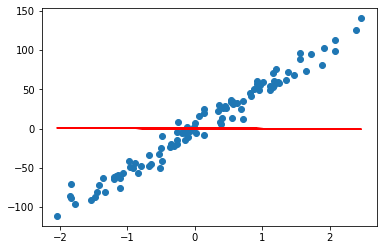

In [77]:
plt.scatter(x,y)
plt.plot(x,model(X,theta),c ='r')

In [78]:
#fonction côut
def cost_fonction(x,y,theta):
    m = len(y)
    return 1/(2*m)* np.sum((model(X,theta)-y)**2)

In [79]:
cost_fonction (X,y,theta) #on veut que ce soit proche du 0

1645.4298558041833

In [80]:
#gradients et descente de gradients 
def grad(X,y,theta):
    m = len(y)
    return 1/m* X.T.dot(model(X,theta)-y)

In [90]:
# descente de gradients 

def gradient_descent(X,y,theta,learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] = cost_fonction(X,y,theta)
    return theta, cost_history
    

In [91]:
theta_final, cost_history = gradient_descent(X,y,theta,learning_rate = 0.01, n_iterations = 1000)#soit, entriaine plus, soit augmente alpha = learning_rate
theta_final # ok j'ai changer le learning rate de 0.001 à 0.01  bcp mieux 

array([[52.48399526],
       [-0.44178824]])

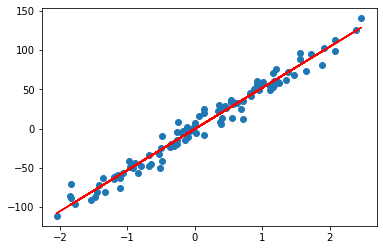

In [97]:
#créer un vecteur de prédiction 
prediction = model(X,theta_final)
plt.scatter(x,y)
plt.plot(x,prediction,c='r')

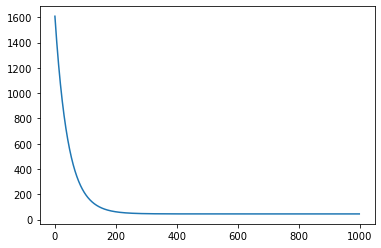

In [98]:
plt.plot(range(1000),cost_history) # à traver les 1000 iteration comment la machine a réussi a minimiser les erreurs

In [102]:
#évaluer  la performation du modèle pour montrer aux gens 
# la coéficient de détermination 
#moindre carré
#R²
def coef_determination (y,predi):
    u = ((y-predi)**2).sum()#residu de la somme des carrée
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [103]:
coef_determination (y,prediction)

0.9721696890554683